# Module 5 - Plotting in python using `matplotlib`
-----------------------------------------------------------------------

## Introduction <a id='0'></a>

The [matplotlib](https://matplotlib.org) library is the standard when it comes to creating plots in python.
It is reasonnably easy to use, accomodates a wide variety of visualisation (including interactive plots), and offers plenty of possibilities to personnalize your plots. It is also the foundation upon which the popular higher-level [seaborn](https://seaborn.pydata.org) library is built.

Most of matplotlib's functionality can be accessed through its `pyplot` module, a collection of functions that were originally developed to make matplotlib resemble MATLAB.

Since having to always type `matplotlib.pyplot` each time a function is accessed does quickly become tieresome, `matplotlib.pyplot` is tradinonally imported as **`plt`**:

In [1]:
import matplotlib.pyplot as plt

> **Note:** if this line fails, it's probably because `matplotlib` is not installed on your system.  
> We recommend you install `matplotlib` as part of 
  [`scipy`](https://www.scipy.org/install.html) using anaconda or pip.


## Why is data visualization necessary?

So far, we have focused a lot on summarizing the data using statistics. However, summary statistics are not enough to understand the distribution &ndash; there are many possible distributions for a given set of summary statistics. Data visualization is necessary to truly understand the distribution:

<div style="text-align: center; margin: 20px 0;">
  <img width="50%" src="https://raw.githubusercontent.com/stefmolin/data-morph/main/docs/_static/panda-to-star-eased.gif" 
       alt="Data Morph: panda to star" style="min-width: 300px; margin-top: 20px;"/>
  <div style="margin-top: 10px;">
    <small><em>(source: <a href="https://stefaniemolin.com/data-morph/stable/index.html">Data Morph</a>)</em></small>
  </div>
</div>


## Your first plot   <a id='2'></a>

Adding data to a figure is done with the **`plt.plot()`** function.

`plt.plot()` accepts 1 or 2 sequences (e.g. tuples or lists) with the same length.

* When passing only **one sequence** to `plt.plot()`, its value are used as **Y axis** values.
  The **X axis** values default to the position of each value in the sequence (starting with index 0).
  In the example below, you can e.g. see that the x-coordinate of the value 8 is 3, because 3 is the
  index of value 8 in our list (it's the 4th value in the list).

In [ ]:
x = [1,2,3,8]

plt.plot(x)
#plt.plot(x, "x")
plt.show()

* When passing **two sequences** to `plt.plot()`, the **first sequence** is taken as **X axis** values and the **second sequence** as **Y axis** values.

In [ ]:
x = [1,2,3,8]
y = [1,5,6,7]

# Passing 2 arguments to plt.plot().
plt.plot(x,y)
#plt.plot(x, y, "x")
plt.show()

<br>

As you can see from the examples above, one particularity of `matplotlib.pyplot` functions is that they **preserve the state of a plot between functions calls**.

For instance, when calling `plt.show()`, there is no need to pass it any argument - it automatically shows the last plot we have created with `plt.plot()`.

The general workflow when creating plots with pyplot is therefore to:
1. **Create a new plot or figure**, e.g. with `plt.plot()`.
2. **Add elements** to the plot using various pyplot functions (e.g. add a title, axes names, legends, ...).
3. **Render** the plot with `plt.show()`.

Note: once a plot is rendered, its underlying plot object is deleted and it cannot be rendered again without building it again.  
In the cell below, we are calling the `plt.show()` method again, but nothing is being plotted:

### Add a title, name the axes <a id='3'></a>
To add a title to our plot:
* `plt.title()`

To label the axes we use the following functions:
* `plt.xlabel()` for the X axis
* `plt.ylabel()` for the Y axis

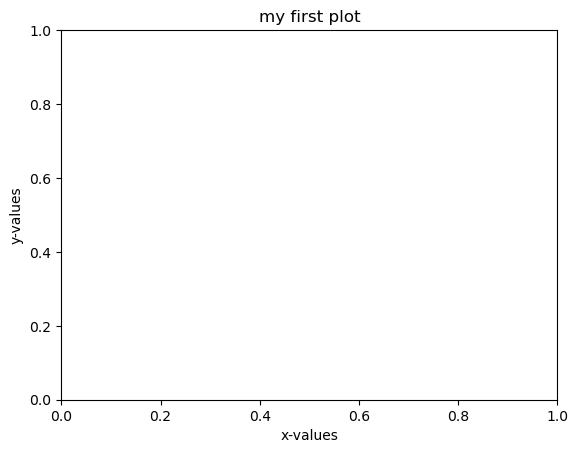

In [2]:
plt.title("my first plot")
plt.xlabel("x-values")
plt.ylabel("y-values")

plt.show()

### Adding a legend <a id='4'></a>

Adding a legend to your plot is often a necessity.  
Luckily, matplotlib makes it easy, thanks to the **`plt.legend()`** function.

Here is an example to illustrate its usage:
* Let's generate 100 numbers equally spaced between 0 and 10 (we use `numpy` to do that easily).
  Then let's apply the `sin()` and `cos()` functions to these numbers and plot the result.

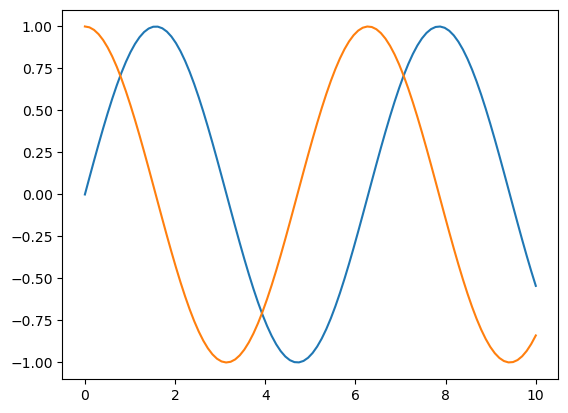

In [5]:
import numpy as np

x = np.linspace(0,10,100)

plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x))

plt.show()

<br> 

To indicate which curve is the sine and which is the cosine, let's add a legend to our plot with `plt.legend()`.

By default, the legend is placed at what matplotlib deems the "best" location, i.e. the location with the least overlap with other features.

**Important:** to be able to display a legend, pyplot **needs a label for each plotted element**:
  * This is specified by passing the `label=...` argument to `plt.plot()`.

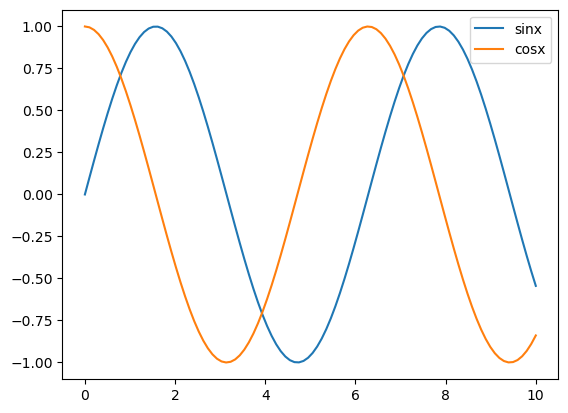

In [6]:
import numpy as np

x = np.linspace(0,10,100)

plt.plot(x,np.sin(x), label="sinx")
plt.plot(x,np.cos(x),label="cosx")

plt.legend()

plt.show()

<br>

**More control** over the position of the legend can be achieved through the **`loc`** argument:
  * `plt.legend(loc='upper right')`
  * `plt.legend(loc='upper center')`
  * `plt.legend(loc='best')` - this is the default.
  * [see here for all options](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html)

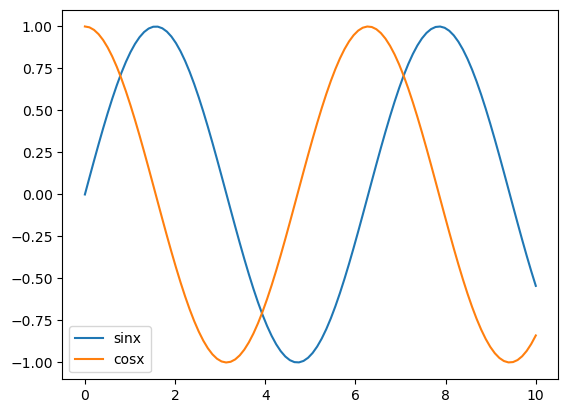

In [9]:
plt.plot(x,np.sin(x), label="sinx")
plt.plot(x,np.cos(x),label="cosx")

plt.legend(loc="lower left")

### Saving your plot as a file <a id='5'></a>

Now that you created a plot, you might also want to save it permanently as an image file.

This is what **`plt.savefig()`** is designed to do. The only mandatory argument is the file path/name where to save the plot:
* `plt.savefig(fname)`

Note that the extension given to the file name is used by matplotlib to determine the format of the file:
* `plt.savefig("my_figure.png")` will create a PNG file - this is the default.
* `plt.savefig("my_figure.jpg")` will create a JPEG file.
* `plt.savefig("my_figure.pdf")` will create a PDF file.

Other optional arguments that relate to image quality or size can also be passed to `plt.savefig()`, for instance:
* `dpi`: dot-per-inch value to use for the output image file.
* `quality`: only applies to JPEG files - the image quality, ranging from 1 (low quality, smaller size) to 95 (highest quality, largest size).
* `transparent`: if True, the image background is set to transparent. 

For a more comprehensive documentation of the `plt.savefig()` function, [see this link](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html).


In [10]:
plt.savefig("sin_cos.jpg", dpi=150)

<Figure size 640x480 with 0 Axes>

##  Plot styling <a id='8'></a>
Changing the style of a plot (e.g. color, use a line or dots, shape of line or dots) can be achieved using two different methods:
* passing specific **keyword arguments** to `plt.plot()` - i.e. passing arguments while specifying their names.
* using so called **format strings**. These are essentially shortcuts to the keyword arguments.

### Changing plot style via keyword arguments <a id='9'></a>
Here is a list of useful keyword arguments that can be passed to `plt.plot()`:
* `color`: the color of the line or dots. This arguments accepts different types of inputs:
    * strings giving the name of the color: e.g. `"green"`, `"blue", "red", "orange", "yellow", "black"`.
    * hex strings: e.g. `"#008000"`.
    * RGB tuples: e.g. `(150, 150, 150)`.  
    

* `marker`: the type of symbol uses to draw data points, for instance:
    * `"o"`: circles.
    * `"s"`: square.
    * `"^"`: triangle.
    * `"+"`: as a "+" shape.
    * `"None"`: do not draw data points (the keyword can also simply be omitted). Note that this value is
      the string `"None"`, not the python `None` object.
    * [see here for a complete list of matplotlib markers](https://matplotlib.org/stable/api/markers_api.html)


* `linestyle`: the type of the line to draw, e.g. `"solid"`, `"dashed"`, `"dotted"`, `"dashdot"`.
* `linewidth`: float value giving the width (thickness) of the line in points. The default is `1.0`.
* `markersize`: float value giving the size of markers (i.e. symbols used to draw points).
* `markerfacecolor` and `markeredgecolor`: color of respectively the inside and edge of markers.

A complete list of keyword arguments can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

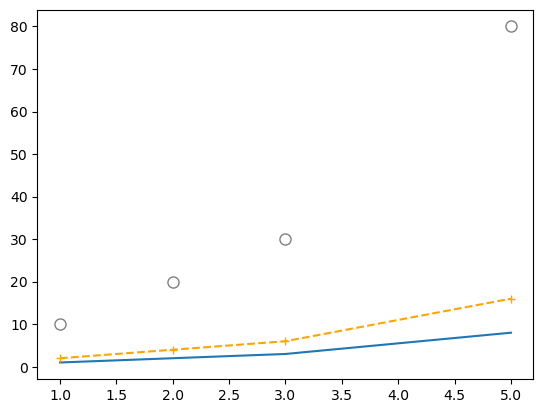

In [12]:
x = [1,2,3,5]
y=[1,2,3,8]
# Create plot with different line and marker styles.
plt.plot(x,y)
plt.plot(x,[y*2 for y in y], color="orange", marker="+",linestyle="dashed")
plt.plot(x,[y*10 for y in y],color="None", marker="o",markersize= 8,markeredgecolor="grey")

plt.show()

## Matplotlib Figures <a id='12'></a>
So far we have seen how to draw a single plot. But matplotlib can do much more than that, allowing you e.g. to have multiple subplots. This requires to introduce the concept of **figure**, which can be seen as the "drawing board" on which you then add individual plots.

### Modifying a plot's size <a id='13'></a>
A first use of the matplotlib figure is to modify a plot's size and aspect ratio. This can be done using the `plt.figure()` function:
* `plt.figure(figsize=(width, height))`, where width and height define the size of the plot in inches.


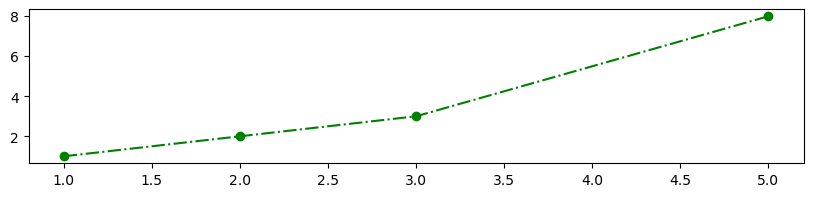

In [13]:
plt.figure(figsize=(10,2))

plt.plot(x,y,color="green", marker="o",linestyle="dashdot")
plt.show()

## Drawing multiple plots per figure <a id='14'></a>
Having more than one plot per figure is possible using pyplot's `plt.subplot()` or `plt.subplots()` functions.
Chosing between these two functions comes down to whether we want to use the **procedural** or an **object-oriented** approach:
* In the **procedural** approach, we make repeated calls to `plt.subplot()` to each time focus on a different subplot of the figure.
* In the **object-oriented** approach, we use `plt.subplots()` to create a **figure** and an **axes** objet. The individual subplots can then be drawn on each **axis** of the axes object.

In both cases, the underlying idea is that sub-plots are organized on a grid defined by a **number of rows** and **number of columns**.

### Procedural approach <a id='15'></a>
This approach uses repetitive calls to the `plt.subplot()` function, passing it 3 arguments each time (**in this order**): 
* number of rows (in the "figure grid").
* number of columns (in the "figure grid").
* number of the sub-plot to currently draw on.

Example: `plt.subplot(2, 3, 1)` will:
* Create a figure with 6 subplots distributed over 2 rows and 3 columns.
* Set the focus on the first subplot (i.e. any command passed at this point will draw on subplot 1).

Subplots are numbered starting with 1 for the top-left subplot, increase increasing as we move to the right of the first row, then continuing on the second row, etc.

The general code structure then looks something like this:
```python
    plt.figure()
    plt.subplot(2, 3, 1) # create a 2 rows x 3 cols matrix of subplots, draw on the first subplot.
    ... # pyplot instructions for the first subplot.
    ...
    plt.subplot(2, 3, 2) # move to the second subplot.
    ... # pyplot instructions for the second subplot.
    ...
    plt.subplot(2, 3, 3) # move to the third subplot.
    etc...
```

Here is an actual example where we draw a figure with 2 subplots:

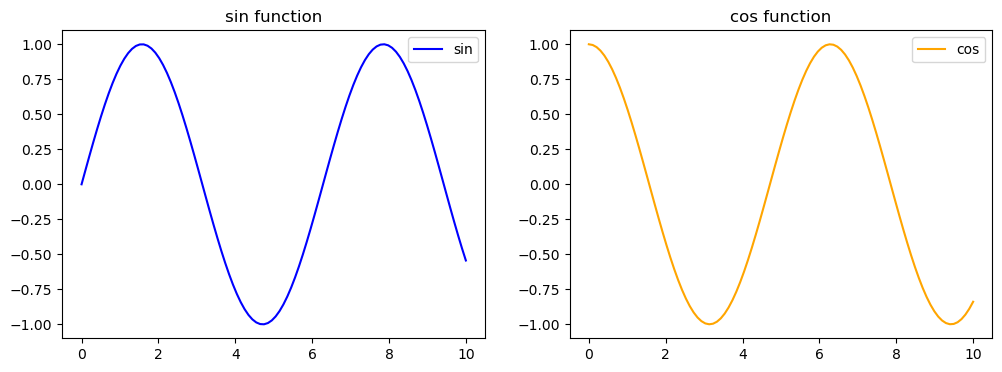

In [14]:
x = np.linspace(0,10,100)

plt.figure(figsize= (12,4))

plt.subplot(1,2,1)
plt.plot(x,np.sin(x),label="sin", color="blue")
plt.title("sin function")
plt.legend(loc="best")

plt.subplot(1,2,2)
plt.plot(x,np.cos(x),label="cos", color="orange")
plt.title("cos function")
plt.legend(loc="best")

plt.show()

## Scatter plots <a id='19'></a>

**Scatter plots** allow to represent data points in a coordinate system (typically 2D). 
* Good to visualize two numeric variables.
* Drawn with **`plt.scatter(x, y, s=None, c=None)`**.
    * `x, y` mandatory arguments, the **x and y coordinates** of the data points.
    * `s` optional, the **marker size** used for each data point, allows to represent different points
      with different sizes.
    * `c` optional, the **marker color** used for each data point.
    * `marker` optional, the **type of marker** to use to represent data points (same as what we have seen in
      the plot styling section).
* For a full documentation, see [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

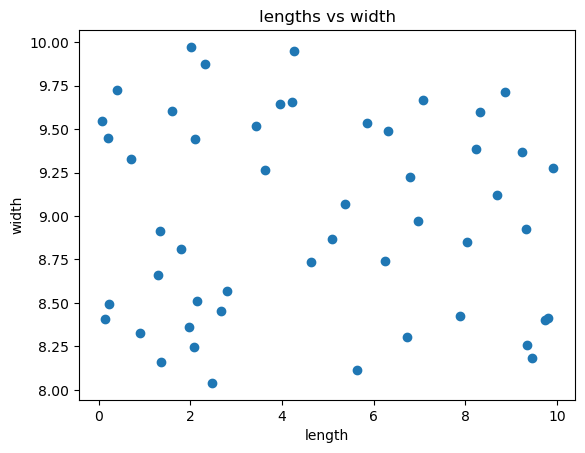

In [16]:
import random

length = np.random.uniform(low=0,high=10, size=(50,))
width = np.random.uniform(low=8,high=10, size=(50,))

plt.scatter(length,width)
plt.title("lengths vs width")
plt.xlabel("length")
plt.ylabel("width")
plt.show()

## Histograms <a id='24'></a>

To graphicaly summarize the distribution of your data, you can plot it as a histogram using the **`plt.hist()`** function.  
You can find more documentation about plotting histograms [here](https://matplotlib.org/3.2.1/gallery/statistics/hist.html).

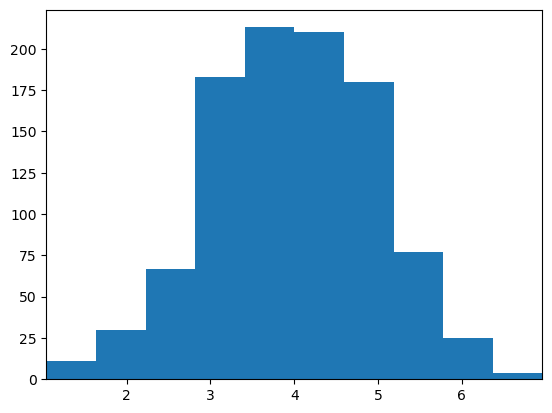

In [18]:
import random

mu = 4
std = 1

x= np.random.normal(mu,std,1000)

plt.hist(x)
plt.xlim((min(x),max(x)))  # you can also specify the limits of the plot axes
plt.show()

## Boxplots <a id='25'></a>

It is possible to make boxplots to visualize your data using the function `plt.boxplot()` and the argument passed should be a list.

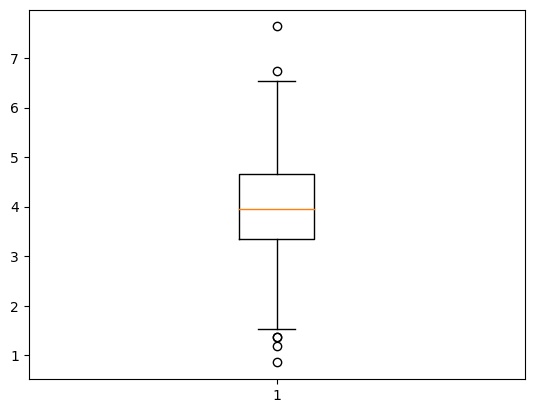

In [19]:

plt.boxplot(x)
plt.show()

You can also visualize multiple boxplots inside the same plot.

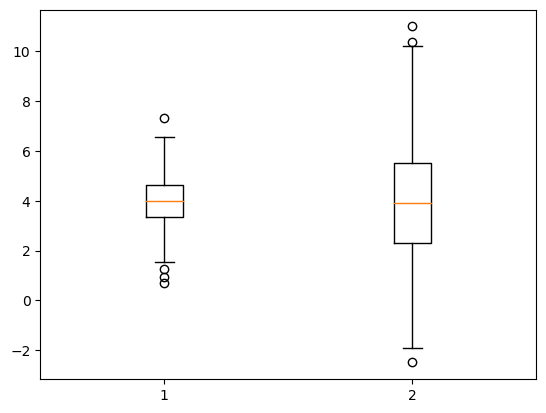

In [20]:
import random

mu = 4
std = 1

x= np.random.normal(mu,std,1000)

y = x+2*np.random.randn(len(x))

plt.boxplot([x,y])

plt.show()

## Bar plots <a id='26'></a>

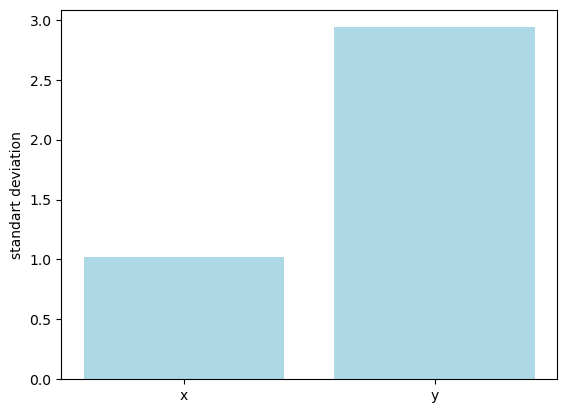

In [21]:
mu = 4
sigma = 1

x= np.random.normal(mu,sigma,1000)
y= np.random.normal(6,3,1000)

mean_var= [np.std(x),np.std(y)]
var_name = ["x","y"]

plt.bar(var_name,mean_var,color="lightblue")

plt.ylabel("standart deviation")
plt.show()

## Heatmap plots <a id='27'></a>

Heatmap plots allows you to visualize with colors the different values contained in a matrix.  
You can find more documentation and example [here](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html) and [here too](https://python-graph-gallery.com/heatmap/) about heatmap plots.

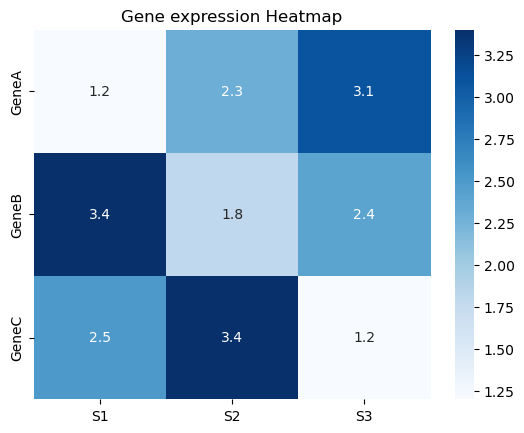

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

data= [
    [1.2,2.3,3.1],
    [3.4,1.8,2.4],
    [2.5,3.4,1.2]
]

gene = ["GeneA","GeneB","GeneC"]
samples =["S1","S2","S3"]

sns.heatmap(data, xticklabels=samples,yticklabels=gene,cmap="Blues",annot=True)

plt.title("Gene expression Heatmap")

plt.show()

## Colormaps <a id='28'></a>

Colormaps are "color palettes" (ranges of colors) that can be useful to draw good representation of the plotted data.
There are different types:
* **Sequential:** 'Purples', 'Blues', 'Greens', ...
* **Diverging:** 'RdYlGn', 'Spectral', 'coolwarm', ... 
* **Cyclic:** 'twilight', 'twilight_shifted', 'hsv'
* **Qualitative:** 'Pastel1', 'Pastel2', 'Paired', ...

You can find a more extensive documentation [here](https://matplotlib.org/2.0.1/users/colormaps.html).